# Use Concrete Data to analyze strength
CSV File: ./concrete_data.csv

In [1]:
# Import Relevant Modules
import pandas as pd
import numpy  as np
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
csv_file = pd.read_csv('./concrete_data.csv')
csv_file.head()

FileNotFoundError: [Errno 2] No such file or directory: './concrete_data.csv'

In [12]:
# We need the shape of the data
shape = csv_file.shape
shape

(1030, 9)

In [13]:
# We need predictors and a target
predictors = csv_file.drop(['Strength'], axis=1)
target = csv_file['Strength']

In [14]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [15]:
predictor_count = predictors.shape[1]
predictor_count

8

In [16]:
input_shape = (predictor_count,)
input_shape

(8,)

In [17]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

# Now we can look at creating our model

In [18]:
# Define a regression model
def regression_model(hidden_layers=1, nodes=10, activation='relu', optimizer='adam'):
    model = Sequential()
     # Add the input layer
    model.add(Input(shape=input_shape))
    
    for i in range(hidden_layers):
        model.add(Dense(nodes, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

model1 = regression_model()
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
def train_test_split_data(seed):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=seed)
    return X_train, X_test, y_train, y_test


In [3]:
def repeat_model_training(seed, normalize=False, epochs=50, hidden_layers=1, nodes=10):
    X_train, X_test, y_train, y_test = train_test_split_data(seed)
    if normalize:
        X_train_mean = X_train.mean()
        X_train_std  = X_train.std()
        X_train = (X_train - X_train_mean)/X_train_std
    model = regression_model(hidden_layers, nodes)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    y_pred = model.predict(X_test)
    result = np.sqrt(mean_squared_error(y_test, y_pred))
    return result

In [21]:
results = np.zeros(50)
for i in range(50):
    results[i] = repeat_model_training(i)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━

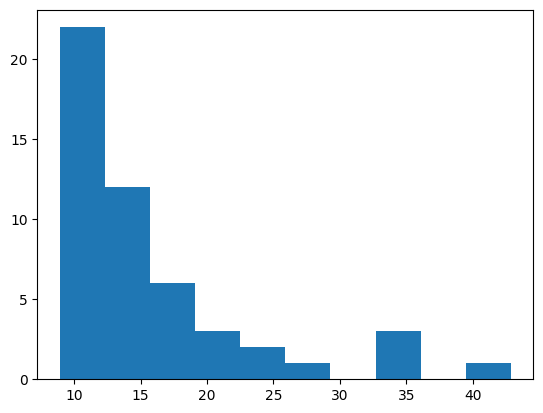

In [22]:
# Plot on a bar chart the results
import matplotlib.pyplot as plt
plt.hist(results, bins=10)
plt.show()

In [23]:
results = np.zeros(50)
for i in range(50):
    results[i] = repeat_model_training(i, normalize=True)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step
10/10 ━━━━━━━━━━━━━

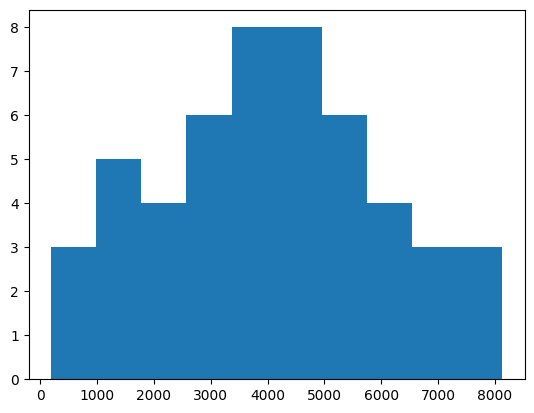

In [24]:
# Plot on a bar chart the results
import matplotlib.pyplot as plt
plt.hist(results, bins=10)
plt.show()